### Kaliebrierung der Kraft Messdosen

Mit diesem Programm werden die Kraftmessdosen Kallibiert

Import der Pakete

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Im Nachfolgendenfeld muss der Link angegeben werden

In [86]:
file = r'C:\Users\Sandro Villiger\switchdrive\Arbeit IBI\Arbeit Uwe\037 Kallibrirung Killian\Testlauf_2_Kraftgeregelt.XLSX'

Für den Import des Excels müssen eine Varaiblen definiert werden. Danach kann das Excel mit Pandas importiert werden

In [87]:
name = ['Zeit', 'Referenz kN', 'Prüfling kN']
data = pd.read_excel(file, header=None, names=name)

Im Nächsten Schritt werden die ersten Zeilen gelöscht.

In [88]:
delet = np.arange(0, 49, 1)
Werte = data.drop(delet, axis=0)

In [89]:
Werte

,Zeit,Referenz kN,Prüfling kN
49,0,0.000018,-0.000001
50,0.2,0.000008,-0.000005
51,0.4,0.000016,-0.000005
52,0.6,-0.000014,0.000001
53,0.8,-0.000025,0.000001
...,...,...,...
2612,512.600024,-0.002568,-0.002834
2613,512.800024,-0.002585,-0.002833
2614,513.000024,-0.00261,-0.002833
2615,513.200024,-0.002602,-0.002831


Als nächstes werden die Spalten komplet in Numpy geladen.

In [90]:
Zeit = np.round(np.array(Werte['Zeit'], dtype='float64'), 1)
Referenz = np.array(Werte['Referenz kN'], dtype='float64')
Prüfling = np.array(Werte['Prüfling kN'], dtype='float64')

Es muss nun von Hand definert werden, ob es ein Zug oder Druckversuch ist.
Zugversuch = 1
Druckversuch = 2


In [91]:
Versuch = 0

Nun wird die Maximalkraft definiert. Diese wird immer Positiv eingegeben. Für die spätere Berechnung wird positiv oder negativ automatisch definiert.

In [92]:
F_max = 2
if Versuch == 0:
    F_max = F_max * -1
else:
    F_max = F_max * 1

Plot der gesamten Versuchsreihe für die Referenzmessdose

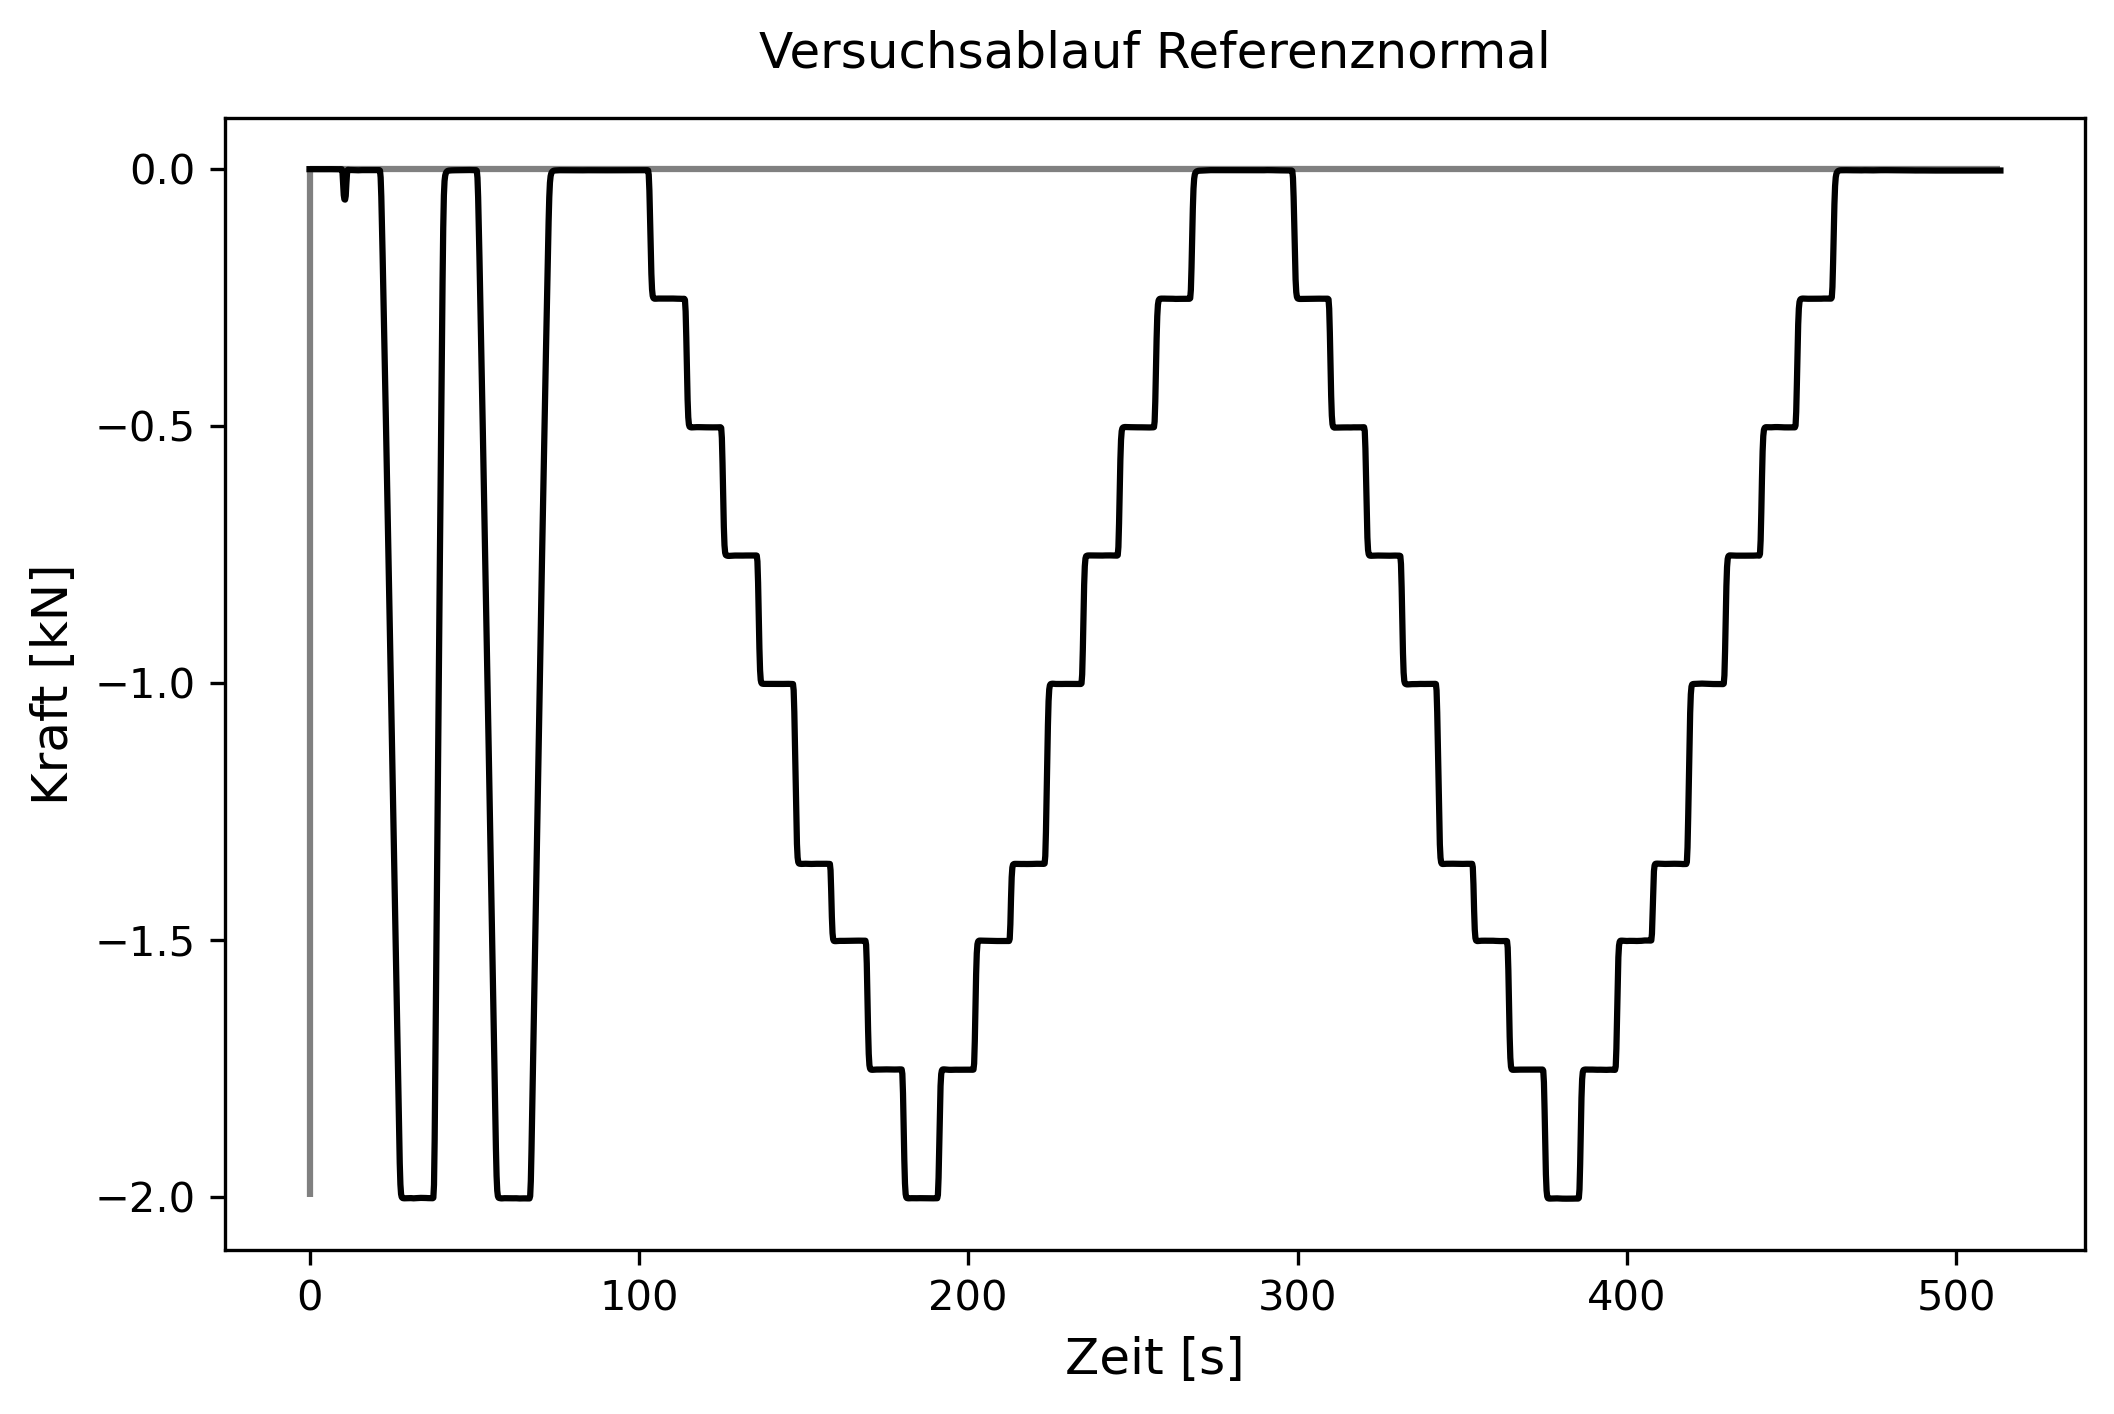

In [93]:
y_Beschriftung = np.linspace(0, F_max, num=5)
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(Zeit,Referenz,color='black')

plt.hlines(0,min(Zeit),max(Zeit),colors='grey')
plt.vlines(min(Zeit),0,F_max,colors='grey')
plt.title('Versuchsablauf Referenznormal', pad=12,fontsize=12)
plt.xlabel('Zeit [s]' ,fontsize=12,)
plt.ylabel('Kraft [kN]' ,fontsize=12,)
plt.yticks(y_Beschriftung)
plt.show()

Die Laststufen für die Berechnung

In [94]:
Stufen = np.array([0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.75, 0.875, 1])
Laststufen = F_max * Stufen

Leere Listen

In [95]:
Mittelwerte_Refernz = [[], [], [], [], [], [], [], [], []]
Mittelwerte_Prüfling = [[], [], [], [], [], [], [], [], []]

Berechnung der Mittelwerte für einzelne Laststufe

In [96]:
for x in range(len(Laststufen)):
    Werte_F = Werte[(Werte['Referenz kN'] >= Laststufen[x] - 0.01) & (Werte['Referenz kN'] <= Laststufen[x] + 0.01)]
    Werte_F_index = Werte[
        (Werte['Referenz kN'] >= Laststufen[x] - 0.01) & (Werte['Referenz kN'] <= Laststufen[x] + 0.01)].index.values
    res = np.where(Werte_F_index[:-1] + 1 != Werte_F_index[1:])[0]

    res = res[res > 10]

    X_max_1 = Werte_F[:res[0] + 1]
    X_max_2 = Werte_F[res[0] + 1:res[1] + 1]
    X_max_3 = Werte_F[res[1] + 1:res[2] + 1]
    X_max_4 = Werte_F[res[2] + 1:]
    Mittelwert = X_max_4.mean()

    Mittelwerte_Refernz[x].append(X_max_1.mean()[1])
    Mittelwerte_Refernz[x].append(X_max_2.mean()[1])
    Mittelwerte_Refernz[x].append(X_max_3.mean()[1])
    Mittelwerte_Refernz[x].append(X_max_4.mean()[1])

    Mittelwerte_Prüfling[x].append(X_max_1.mean()[2])
    Mittelwerte_Prüfling[x].append(X_max_2.mean()[2])
    Mittelwerte_Prüfling[x].append(X_max_3.mean()[2])
    Mittelwerte_Prüfling[x].append(X_max_4.mean()[2])

Mittelwerte_Refernz = np.array(Mittelwerte_Refernz)
Mittelwerte_Prüfling = np.array(Mittelwerte_Prüfling)

Mittelwert über die Referenzmessdose

In [97]:
Mittelwerte_Refernz

array([[-0.25185567, -0.25225026, -0.25213137, -0.25217603],
       [-0.50189295, -0.50222178, -0.50249406, -0.50226674],
       [-0.75181575, -0.75187649, -0.75177875, -0.75206024],
       [-1.00143977, -1.00169894, -1.0017102 , -1.00168596],
       [-1.35162028, -1.35207997, -1.35177839, -1.35176908],
       [-1.50163316, -1.50173003, -1.50149736, -1.50145711],
       [-1.50163316, -1.50173003, -1.50149736, -1.50145711],
       [-1.75177981, -1.75207845, -1.75203364, -1.75233309],
       [-2.00195564, -2.00240285, -2.00213563, -2.0029084 ]])

Mittelwert über die zu Prüfendemessdose

In [98]:
Mittelwerte_Prüfling

array([[-0.25195895, -0.2522829 , -0.2523001 , -0.25229575],
       [-0.50224598, -0.5024337 , -0.50290924, -0.50253064],
       [-0.75242676, -0.752396  , -0.75248566, -0.75264369],
       [-1.0024158 , -1.00260709, -1.00274779, -1.00261831],
       [-1.35310021, -1.35353941, -1.35329345, -1.35325979],
       [-1.50331287, -1.50341628, -1.50319419, -1.50315358],
       [-1.50331287, -1.50341628, -1.50319419, -1.50315358],
       [-1.75383497, -1.75413878, -1.75409725, -1.75441566],
       [-2.00458899, -2.00496057, -2.0045359 , -2.00533251]])

Mittelwert über die komplete Laststufe

In [99]:
Refernz_mean = np.mean(Mittelwerte_Refernz, axis=1)
Prüfling_mean = np.mean(Mittelwerte_Prüfling, axis=1)

Mittelwert über die Referenzmessdose

Refernz_mean

Mittelwert über die zu Prüfendemessdose

In [100]:
Prüfling_mean

array([-0.25220943, -0.50252989, -0.75248803, -1.00259725, -1.35329821,
       -1.50326923, -1.50326923, -1.75412167, -2.00485449])

Berechnung der Relativen Abweichung

In [101]:
A = ((Refernz_mean - Prüfling_mean) / F_max) * 100

In [102]:
A

array([-0.00530465, -0.01555034, -0.03026092, -0.04817651, -0.07431417,
       -0.08449064, -0.08449064, -0.10327095, -0.12519303])